# unit 4.1 - Convolutional neural network example

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/culurciello/deep-learning-course-source/blob/main/source/lectures/41-conv-size-your-data.ipynb)

In [1]:
# Size a neural network to your own data
# an exercise
# here image are 32 x 32, 10 categories 

import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        print(x.shape)
        x = self.conv1(x)
        print(x.shape)
        x = self.pool(F.relu(x))
        print(x.shape)
        x = self.conv2(x)
        print(x.shape)
        x = self.pool(F.relu(x))
        print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        print(x.shape)
        return x

images = torch.zeros(1,1,32,32).float()
net = Net()

# test sizes
net(images)

torch.Size([1, 1, 32, 32])
torch.Size([1, 6, 28, 28])
torch.Size([1, 6, 14, 14])
torch.Size([1, 16, 10, 10])
torch.Size([1, 16, 5, 5])
torch.Size([1, 400])
torch.Size([1, 10])


tensor([[ 0.0432,  0.0925,  0.0928, -0.1063,  0.0224,  0.0446,  0.0849,  0.0019,
         -0.0039, -0.0315]], grad_fn=<AddmmBackward0>)

In [2]:
# now with new data - your image size is for example 36x36 - still 10 categories

class NetYou(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        # self.fc1 = nn.Linear(36*36, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        print(x.shape)
        x = self.conv1(x)
        print(x.shape)
        x = self.pool(F.relu(x))
        print(x.shape)
        x = self.conv2(x)
        print(x.shape)
        x = self.pool(F.relu(x))
        print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        print(x.shape)
        return x

images = torch.zeros(1,1,36,36).float()
net = NetYou()

# test sizes

out = net(images)
print("OUTPUT", out)


torch.Size([1, 1, 36, 36])
torch.Size([1, 6, 32, 32])
torch.Size([1, 6, 16, 16])
torch.Size([1, 16, 12, 12])
torch.Size([1, 16, 6, 6])
torch.Size([1, 576])
torch.Size([1, 10])
OUTPUT tensor([[ 0.1236, -0.0587,  0.0465, -0.1093,  0.1002,  0.0442,  0.0430, -0.0308,
         -0.1157, -0.1075]], grad_fn=<AddmmBackward0>)


In [3]:
# now with new data - your image size is for example 64x64 - still 10 categories

class NetYou(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(3, 3)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # self.conv3 = nn.Conv2d(16, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # self.fc1 = nn.Linear(36*36, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        print("input:", x.shape)
        x = self.conv1(x)
        print("after 1st conv:", x.shape)
        x = self.pool(F.relu(x))
        print("after 1st pool:", x.shape)
        x = self.conv2(x)
        print(x.shape)
        x = self.pool(F.relu(x))
        print(x.shape)
        # x = self.conv3(x)
        # print(x.shape)
        # x = self.pool(F.relu(x))
        # print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        print(x.shape)
        return x

images = torch.zeros(1,1,64,64).float()
net = NetYou()

# test sizes
out = net(images)
print("OUTPUT", out)

input: torch.Size([1, 1, 64, 64])
after 1st conv: torch.Size([1, 6, 60, 60])
after 1st pool: torch.Size([1, 6, 20, 20])
torch.Size([1, 16, 16, 16])
torch.Size([1, 16, 5, 5])
torch.Size([1, 400])
torch.Size([1, 10])
OUTPUT tensor([[-0.0929, -0.0381, -0.1086, -0.0270, -0.0347, -0.0871, -0.0408,  0.0501,
         -0.0742, -0.0289]], grad_fn=<AddmmBackward0>)


In [4]:
# what if you have some large images, that are too large for small neural nets?

import torchvision

images = torch.zeros(1,1,360,360).float()
print('Before:', images.shape)

resizer = torchvision.transforms.Resize(size=(36,36))

images = resizer(images)
print('After:', images.shape)

# it is better to do this on the entire dataset before training
# since during training you may have to resize images at EVERY batch ==> inefficient

Before: torch.Size([1, 1, 360, 360])
After: torch.Size([1, 1, 36, 36])


/opt/homebrew/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Before (104, 86)


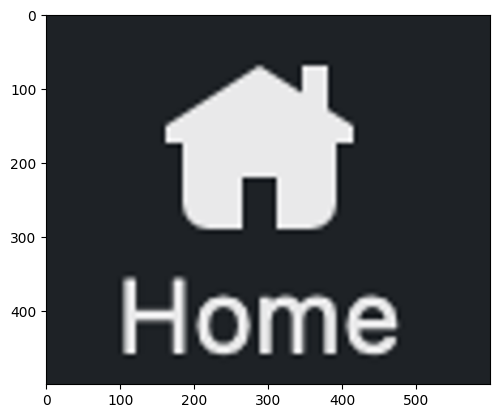

In [8]:
# using PIL module
from PIL import Image
import matplotlib.pyplot as plt
 
# Opens a image:
im = Image.open(r"images/home.png")
width, height = im.size
print("Before", im.size)

newsize = (600, 500)
im = im.resize(newsize)
# plt.imshow(im)
plt.imshow(im)
plt.show()